#**P P3 Redes Neuronales 🧠**
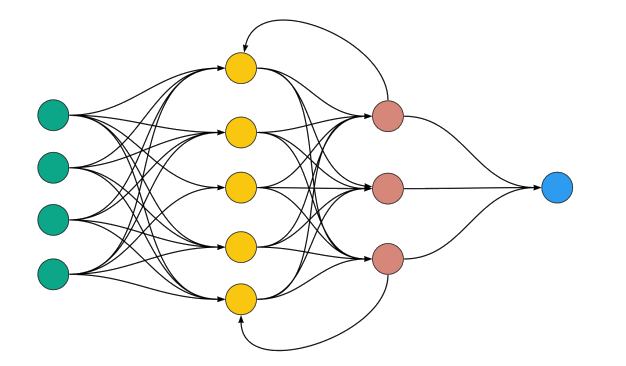

Imagen recuperada el 19/11/2025 de https://openwebinars.net/blog/que-son-las-redes-neuronales-y-sus-aplicaciones/


🔹 María Elisa Olivares Quiroga | 611066🔹

Para este proyecto parcial, el objetivo es desarrollar un modelo de clasificación basado en redes neuronales convolucionales (CNN), evaluar su desempeño utilizando un conjunto de prueba ciego y demostrar su funcionamiento en tiempo real.

El propósito de este documento es desarrollar los puntos 1 al 5 establecidos en las instrucciones, las cuales se encuentran disponiblse en los archivos del repositorio de GitHub.


###✨ Importar las imágenes al ambiente de trabajo

Para el entrenamiento y validación de los modelos a proponer, es necesario primeramente subir las imágenes que se encuentran en la base de datos del grupo. Para ello, realicé una copia de la carpeta Train y la coloqué en mi unidad de Drive.

Comenzando con el código, lo primero que se hace es montar Google Drive en Google Colab y otorgar permisos de acceso. Posteriormente, se define la ruta donde se encuentra la carpeta con las imágenes y se verifica que exista. En caso de que la ruta no sea válida, el programa arroja un error.

Una vez validada la ruta, se configura un ImageDataGenerator, que es la herramienta de Keras encargada de leer las imágenes desde la carpeta y prepararlas para el entrenamiento. En este caso, se aplica únicamente una normalización de los píxeles y se establece un validation_split del 20%; es decir, el generador separará automáticamente el 80% de las imágenes para entrenamiento y el 20% restante para validación.

Luego, se crean dos generadores:

🔸 train_gen: utiliza el subconjunto de entrenamiento.

🔸 val_gen: utiliza el subconjunto de validación.

Ambos generadores convierten las imágenes a 28×28 píxeles, en escala de grises, con un batch size de 64, y asignan automáticamente las etiquetas según las carpetas que se encuentren dentro de Train. Además, el generador de entrenamiento mezcla aleatoriamente las imágenes.

Finalmente, se imprime la cantidad de imágenes cargadas en cada generador, así como el número total de clases detectadas.

In [ ]:
# ============================================
# Montar Google Drive
# ============================================
from google.colab import drive
drive.mount('/content/drive')

# ============================================
# Definir ruta
# ============================================
drive_images_folder = "/content/drive/MyDrive/Train"

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Verificar carpeta
if not os.path.exists(drive_images_folder):
    raise Exception(f"❌ La carpeta no existe: {drive_images_folder}")
print("📁 Carpeta encontrada:", drive_images_folder)

# ============================================
# Crear DataGenerator con normalización
# ============================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# ============================================
# Generador de TRAIN
# ============================================
train_gen = datagen.flow_from_directory(
    drive_images_folder,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# ============================================
# Generador de VALIDATION
# ============================================
val_gen = datagen.flow_from_directory(
    drive_images_folder,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("\n✨ Generadores creados:")
print(f"🔹 Imágenes entrenamiento: {train_gen.samples}")
print(f"🔹 Imágenes validación:    {val_gen.samples}")
print(f"🔸 Clases detectadas:       {train_gen.num_classes}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Carpeta encontrada: /content/drive/MyDrive/Train
Found 5685 images belonging to 10 classes.
Found 1415 images belonging to 10 classes.

✨ Generadores creados:
🔹 Imágenes entrenamiento: 5685
🔹 Imágenes validación:    1415
🔸 Clases detectadas:       10


###✨ Arquitectura de red neuronal convolucional inicial

Para construir la arquitectura de la red neuronal convolucional (CNN) inicial, se definió un modelo secuencial en Keras compuesto por las siguientes capas: una capa convolucional con 32 filtros de tamaño 3×3, activación ReLU y padding tipo same; después, una capa de MaxPooling 2×2 seguida de una capa Flatten, que transforma las características obtenidas en un vector. Posteriormente, se incluyó una capa densa de 128 neuronas con activación ReLU y, finalmente, una capa de salida con 10 neuronas y activación softmax, la cual genera las probabilidades correspondientes a cada una de las diez clases.

Una vez definida la arquitectura, el modelo se compiló utilizando el optimizador Adam, la función de pérdida categorical_crossentropy y la métrica accuracy.

Además, se implementó un callback de EarlyStopping para detener el entrenamiento en caso de que la precisión en validación dejara de mejorar durante 5 épocas.

El modelo se entrenó utilizando el conjunto de entrenamiento previamente generado, con un máximo de 30 épocas y monitoreando el desempeño en el subconjunto de validación.

In [ ]:
# ============================================
# DEFINIR CNN (Modelo Original)
# ============================================
from tensorflow.keras import models, layers

model = models.Sequential()
# Capa convolucional 1
model.add(layers.Conv2D(
    32, (3, 3),
    padding='same',
    activation='relu',
    input_shape=(28, 28, 1)
))
# MaxPooling 1
model.add(layers.MaxPooling2D((2, 2)))
# Flatten
model.add(layers.Flatten())
# Capa densa
model.add(layers.Dense(128, activation='relu'))
# Capa de salida (softmax)
model.add(layers.Dense(10, activation='softmax'))

# ============================================
# COMPILAR
# ============================================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar resumen del modelo
model.summary()

# ============================================
# EARLY STOPPING
# ============================================
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# ============================================
# ENTRENAR
# ============================================
history = model.fit(
    train_gen,
    epochs=30,
    batch_size=64,
    validation_data=val_gen,
    callbacks=[early_stop]
)

# ============================================
# GUARDAR MODELO
# ============================================
model.save("model_original.h5")
print("\n📁 Modelo guardado como model_original.h5")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 549ms/step - accuracy: 0.1903 - loss: 2.2474 - val_accuracy: 0.4339 - val_loss: 1.8273
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 46s 522ms/step - accuracy: 0.5196 - loss: 1.6005 - val_accuracy: 0.5746 - val_loss: 1.5113
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 46s 514ms/step - accuracy: 0.6188 - loss: 1.2737 - val_accuracy: 0.6085 - val_loss: 1.4228
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 544ms/step - accuracy: 0.6763 - loss: 1.0990 - val_accuracy: 0.6304 - val_loss: 1.3308
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 560ms/step - accuracy: 0.7142 - loss: 0.9586 - val_accuracy: 0.6403 - val_loss: 1.3345
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 47s 525ms/step - accuracy: 0.7427 - loss: 0.8636 - val_accuracy: 0.6650 - val_loss: 1.2628
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 45s 511ms/step - accuracy: 0.7723 - loss: 0.7790 - val_accuracy: 0.6707 - val_loss: 1.2424
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 48s 536ms/step - accuracy: 0.7853 - loss: 0.7079 - val_accu


📁 Modelo guardado como model_original.h5


La capa de entrada recibe imágenes de tamaño 28x28x1. La capa convolucional aplica 32 filtros diferentes, generando un volumen de características con forma (28, 28, 32) y 320 parámetros. Luego, la capa de Max Pooling reduce la dimensionalidad a (14, 14, 32), y este volumen se aplana en un vector unidimensional de 6272 elementos (14 * 14 * 32).

La capa densa conecta sus 128 neuronas a los 6272 valores del vector, acumulando la mayor cantidad de parámetros del modelo: 6272 * 128 + 128 = 802944. Finalmente, la capa de salida tiene 10 neuronas, cada una correspondiente a una de las 10 clases del dataset, proporcionando la probabilidad de pertenencia de la imagen a cada clase.

###✨ Función para revisión de desempeño con datos de validación

Como esta revisión se utilizará varias veces, se creó la función plot_model_history, la cual permite analizar de manera clara y visual cómo se comporta cada modelo después del entrenamiento. La función identifica la época con el mejor accuracy de validación y muestra ese valor para referencia. Después genera dos gráficas: una de accuracy y otra de loss, incluyendo una línea roja que marca la mejor época. Esto facilita comparar el desempeño del modelo, detectar posibles problemas como sobreajuste y evaluar qué tan bien se comporta en datos nuevos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_model_history(history, early_stop, model_name="Mi Modelo"):
    best_epoch = np.argmax(history.history['val_accuracy'])+1


    print(f"\n📊 Resultados del entrenamiento: {model_name}\n")
    print(f"✨ Época con mejor desempeño: {best_epoch}")
    print(f"📈 Mayor Accuracy de validación: {history.history['val_accuracy'][best_epoch - 1]:.4f}\n")


    # ================================
    # Gráfica de accuracy
    # ================================
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.axvline(x=best_epoch, color='r', linestyle='--', label='Best Epoch')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend()

    # ================================
    # Gráfica de loss
    # ================================
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.axvline(x=best_epoch, color='r', linestyle='--', label='Best Epoch')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend()

    plt.tight_layout()
    plt.show()


 ➡️ A continuación, se utiliza la función plot_model_history para analizar el desempeño del Modelo Original, permitiendo visualizar de forma clara sus métricas de entrenamiento y validación.


📊 Resultados del entrenamiento: Modelo Original

✨ Época con mejor desempeño: 21
📈 Mayor Accuracy de validación: 0.7131



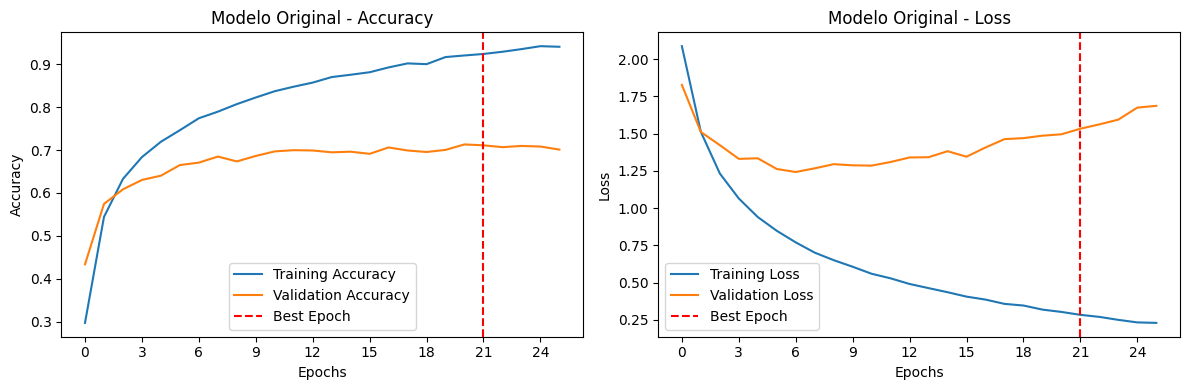

In [ ]:
plot_model_history(history, early_stop, model_name="Modelo Original")

Como se puede observar en las gráficas, el desempeño del primer modelo, si bien no es el ideal, alcanza un accuracy de validación aceptable del 71.31%. Sin embargo, será necesario aplicar estrategias adicionales de regularización y generalización si se desea mejorar su rendimiento tanto en el conjunto de prueba como en una implementación en tiempo real.

###✨ Modificaciones a la arquitectura

En los siguientes bloques de código se propondrán diversos ajustes al modelo original con el fin de mejorar su desempeño al momento de clasificar los números de la base de datos.

Para mejorar el desempeño del modelo original, se decidió incorporar data augmentation durante el preprocesamiento de imágenes. Para ello, se utilizó la función ImageDataGenerator, la cual permite generar variaciones artificiales de las imágenes originales.

En este bloque las siguientes transformaciones:

🔹🔄 Rotaciones de hasta 25°

🔹↔️ Desplazamientos horizontales del 20%

🔹↕️ Desplazamientos verticales del 20%

🔹🔍 Zoom aleatorio de hasta 25%

🔹📐 Shear (inclinación) de hasta 15°

Estas modificaciones permiten que la red neuronal vea versiones distintas de las mismas imágenes en cada época, reduciendo el sobreajuste y mejorando la capacidad de generalización del modelo.

A partir de este punto, todos los modelos se entrenarán utilizando estas imágenes aumentadas, asegurando un aprendizaje más robusto y variado.

In [ ]:
# ============================================
# Definir ruta
# ============================================
drive_images_folder = "/content/drive/MyDrive/Train"

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Verificar carpeta
if not os.path.exists(drive_images_folder):
    raise Exception(f"❌ La carpeta no existe: {drive_images_folder}")
print("📁 Carpeta encontrada:", drive_images_folder)

# ============================================
# Crear DataGenerator con normalización + AUGMENTATION
# ============================================
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25,
    shear_range=15,
)
# ============================================
# Generador de TRAIN
# ============================================
train_gen_aug = datagen_aug.flow_from_directory(
    drive_images_folder,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# ============================================
# Generador de VALIDATION
# ============================================
val_gen_aug = datagen_aug.flow_from_directory(
    drive_images_folder,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

📁 Carpeta encontrada: /content/drive/MyDrive/Train
Found 5685 images belonging to 10 classes.
Found 1415 images belonging to 10 classes.


##⭐ Modelo 1 ⭐

Para este primer modelo se mantuvo la misma arquitectura del modelo original; sin embargo, durante el entrenamiento se incorporó el data augmentation previamente descrito. El objetivo de esta decisión fue evaluar si la estructura base del modelo era suficiente para alcanzar un desempeño adecuado en la clasificación o si sería necesario añadir más capas y/o realizar ajustes adicionales en la arquitectura.

In [ ]:
# ============================================
# DEFINIR CNN (Modelo 1)
# ============================================
from tensorflow.keras import models, layers

model1 = models.Sequential()

# Capa convolucional 1
model1.add(layers.Conv2D(
    32, (3, 3),
    padding='same',
    activation='relu',
    input_shape=(28, 28, 1)
))
# MaxPooling 1
model1.add(layers.MaxPooling2D((2, 2)))
# Flatten
model1.add(layers.Flatten())
# Capa densa
model1.add(layers.Dense(128, activation='relu'))
# Capa de salida (softmax)
model1.add(layers.Dense(10, activation='softmax'))

# ============================================
# COMPILAR
# ============================================
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar resumen del modelo
model1.summary()

# ============================================
# EARLY STOPPING
# ============================================
from tensorflow.keras.callbacks import EarlyStopping

early_stop1 = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# ============================================
# ENTRENAR
# ============================================
history1 = model1.fit(
    train_gen_aug,
    epochs=30,
    batch_size=64,
    validation_data=val_gen_aug,
    callbacks=[early_stop1]
)

# ============================================
# GUARDAR MODELO
# ============================================
model1.save("model_1.h5")
print("\n📁 Modelo guardado como model_1.h5")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 571ms/step - accuracy: 0.1075 - loss: 2.3202 - val_accuracy: 0.1187 - val_loss: 2.2721
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 571ms/step - accuracy: 0.1776 - loss: 2.2518 - val_accuracy: 0.2452 - val_loss: 2.1941
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 576ms/step - accuracy: 0.2246 - loss: 2.1811 - val_accuracy: 0.2721 - val_loss: 2.1343
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 572ms/step - accuracy: 0.2552 - loss: 2.1122 - val_accuracy: 0.3081 - val_loss: 2.0767
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 47s 527ms/step - accuracy: 0.2866 - loss: 2.0439 - val_accuracy: 0.2848 - val_loss: 2.0256
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 551ms/step - accuracy: 0.3004 - loss: 1.9832 - val_accuracy: 0.3413 - val_loss: 1.9597
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 48s 539ms/step - accuracy: 0.3523 - loss: 1.9017 - val_accuracy: 0.3286 - val_loss: 1.9379
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 554ms/step - accuracy: 0.3577 - loss: 1.8658 - val_accu


📁 Modelo guardado como model_1.h5


➡️ A continuación, se utiliza la función plot_model_history para analizar el desempeño del Modelo 1, permitiendo visualizar de forma clara sus métricas de entrenamiento y validación.


📊 Resultados del entrenamiento: Modelo 1

✨ Época con mejor desempeño: 28
📈 Mayor Accuracy de validación: 0.5131



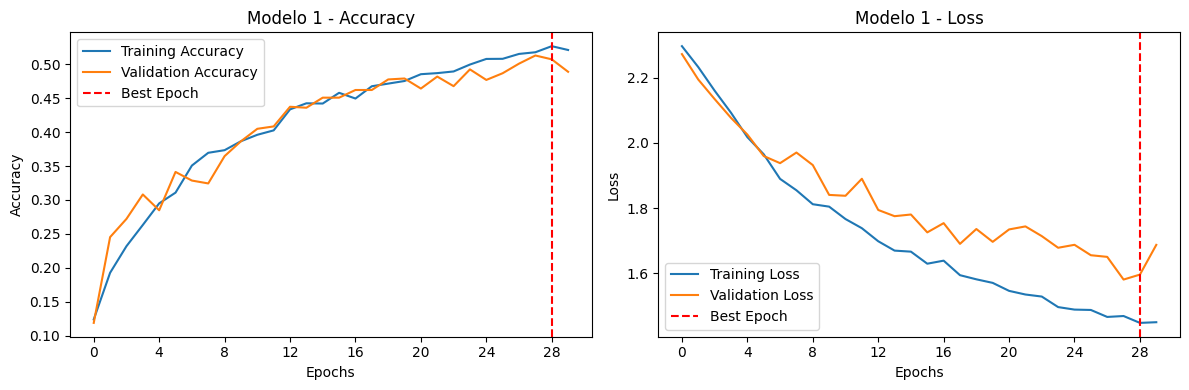

In [ ]:
plot_model_history(history1, early_stop1, model_name="Modelo 1")

Como se puede observar en las gráficas, el aumento de datos contribuye de manera significativa a mejorar la generalización del modelo. Sin embargo, al contar únicamente con una capa convolucional, el modelo permanece claramente subajustado, lo que limita su capacidad para aprender patrones más complejos.

##⭐ Modelo 2 ⭐

Para este segundo modelo se tomó como base la arquitectura del Modelo 1; sin embargo, se incorporaron varias mejoras:

✅ Se añadió BatchNormalization, para estabilizar la distribución de activaciones durante el entrenamiento.

✅ Se integró una segunda capa convolucional de 64 filtros, acompañada de BatchNormalization, lo que incrementa la capacidad del modelo para extraer características más complejas de las imágenes.

✅ Se incluyó una capa de Dropout (0.3), que actúa como mecanismo de regularización al desconectar ciertas neuronas de forma aleatoria.

✅ Se agregaron capas adicionales de MaxPooling, las cuales reducen la dimensionalidad y permiten conservar las características más relevantes.

In [ ]:
# ============================================
# DEFINIR CNN (Modelo 2)
# ============================================
from tensorflow.keras import models, layers

model2 = models.Sequential()

# Convolucional 1
model2.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
# Convolucional 2
model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
# Aplanar
model2.add(layers.Flatten())
# Capa densa
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.3))
# Capa de salida
model2.add(layers.Dense(10, activation='softmax'))

# ============================================
# COMPILAR
# ============================================
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen
model2.summary()

# ============================================
# EARLY STOPPING
# ============================================
from tensorflow.keras.callbacks import EarlyStopping

early_stop2 = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# ============================================
# ENTRENAR
# ============================================
history2 = model2.fit(
    train_gen_aug,
    epochs=30,
    batch_size=64,
    validation_data=val_gen_aug,
    callbacks=[early_stop2]
)

# ============================================
# GUARDAR MODELO
# ============================================
model2.save("model_2.h5")
print("\n📁 Modelo guardado como model_2.h5")


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 56s 579ms/step - accuracy: 0.1185 - loss: 2.8397 - val_accuracy: 0.1032 - val_loss: 3.0865
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 580ms/step - accuracy: 0.1319 - loss: 2.2823 - val_accuracy: 0.1011 - val_loss: 4.4952
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 48s 542ms/step - accuracy: 0.1494 - loss: 2.2657 - val_accuracy: 0.1357 - val_loss: 3.7688
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 579ms/step - accuracy: 0.1865 - loss: 2.2093 - val_accuracy: 0.1576 - val_loss: 3.2514
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 578ms/step - accuracy: 0.2321 - loss: 2.1009 - val_accuracy: 0.2212 - val_loss: 2.1874
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 562ms/step - accuracy: 0.2858 - loss: 1.9624 - val_accuracy: 0.3201 - val_loss: 1.8748
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 559ms/step - accuracy: 0.3077 - loss: 1.8925 - val_accuracy: 0.3145 - val_loss: 1.8924
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 592ms/step - accuracy: 0.3470 - loss: 1.8142 - val_accu


📁 Modelo guardado como model_2.h5


➡️ A continuación, se utiliza la función plot_model_history para analizar el desempeño del Modelo 2, permitiendo visualizar de forma clara sus métricas de entrenamiento y validación.


📊 Resultados del entrenamiento: Modelo 2

✨ Época con mejor desempeño: 28
📈 Mayor Accuracy de validación: 0.6106



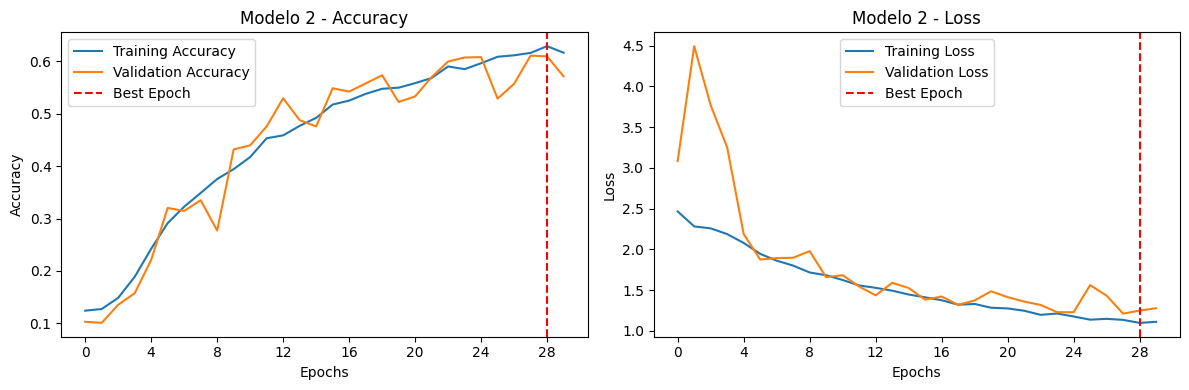

In [ ]:
plot_model_history(history2, early_stop2, model_name="Modelo 2")

Como se puede observar en los resultados del Modelo 2, la incorporación de una segunda capa convolucional sí permitió aumentar el accuracy en validación. Además, ambas curvas (tanto la de accuracy como la de loss) presentan variaciones bruscas y picos pronunciados, lo cual sugiere que el learning rate podría ser demasiado alto.

##⭐ Modelo 3 ⭐

Para este tercer modelo se tomó como base la arquitectura del Modelo 2; sin embargo, se incorporaron mejoras clave para incrementar su desempeño:

✅ Se añadió una tercera capa convolucional con BatchNormalization y MaxPooling, lo que permite extraer características más profundas y estabilizar el entrenamiento.

✅ Se integraron múltiples capas de Dropout en distintas etapas de la red para fortalecer la regularización y evitar que el modelo memorice los datos.

✅ Se ampliaron las capas densas y se ajustó el learning rate del optimizador Adam a un valor menor, con el fin de lograr una convergencia más estable.

In [ ]:
# ============================================
# DEFINIR CNN (Modelo 3)
# ============================================
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

model3 = models.Sequential()

# Convolucional 1
model3.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.25))
# Convolucional 2
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.25))
# Convolucional 3
model3.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.3))
# Flatten
model3.add(layers.Flatten())
# Capas densas
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.3))
# Capa de salida
model3.add(layers.Dense(10, activation='softmax'))

# ============================================
# COMPILAR
# ============================================
model3.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen
model3.summary()

# ============================================
# EARLY STOPPING
# ============================================
from tensorflow.keras.callbacks import EarlyStopping

early_stop3 = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# ============================================
# ENTRENAR
# ============================================
history3 = model3.fit(
    train_gen_aug,
    epochs=30,
    batch_size=64,
    validation_data=val_gen_aug,
    callbacks=[early_stop3]
)

# ============================================
# GUARDAR MODELO
# ============================================
model3.save("model_3.h5")
print("\n📁 Modelo guardado como model_3.h5")

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,946 (1.62 MB)

 Trainable params: 422,986 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 64s 619ms/step - accuracy: 0.1046 - loss: 3.0836 - val_accuracy: 0.1102 - val_loss: 2.3810
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 48s 535ms/step - accuracy: 0.1253 - loss: 2.6986 - val_accuracy: 0.1053 - val_loss: 2.4801
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 576ms/step - accuracy: 0.1408 - loss: 2.5055 - val_accuracy: 0.1124 - val_loss: 2.5632
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 556ms/step - accuracy: 0.1588 - loss: 2.3973 - val_accuracy: 0.1237 - val_loss: 2.4021
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 593ms/step - accuracy: 0.1985 - loss: 2.2761 - val_accuracy: 0.1611 - val_loss: 2.2494
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 564ms/step - accuracy: 0.2173 - loss: 2.1973 - val_accuracy: 0.2254 - val_loss: 2.0962
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 561ms/step - accuracy: 0.2243 - loss: 2.1304 - val_accuracy: 0.3208 - val_loss: 1.9415
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 583ms/step - accuracy: 0.2865 - loss: 2.0216 - val_accu


📁 Modelo guardado como model_3.h5


➡️ A continuación, se utiliza la función plot_model_history para analizar el desempeño del Modelo 3, permitiendo visualizar de forma clara sus métricas de entrenamiento y validación.


📊 Resultados del entrenamiento: Modelo 3

✨ Época con mejor desempeño: 29
📈 Mayor Accuracy de validación: 0.6820



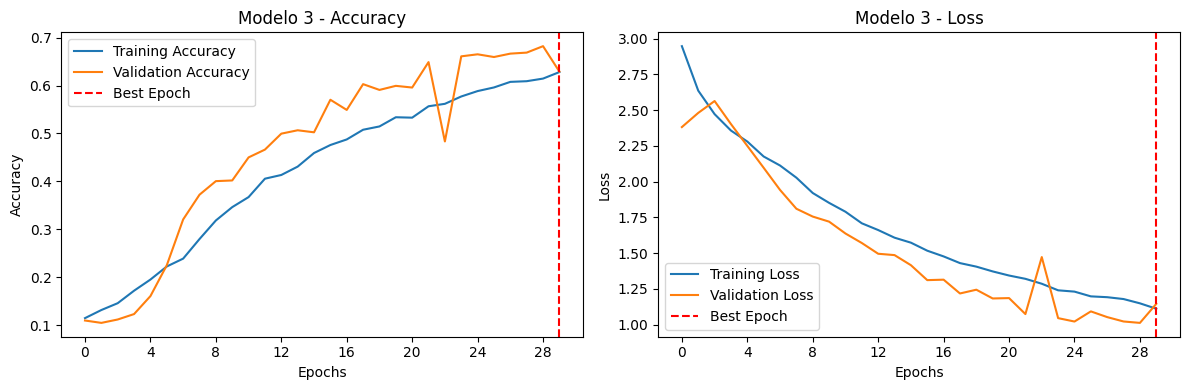

In [ ]:
plot_model_history(history3, early_stop3, model_name="Modelo 3")

En estas gráficas se observa con claridad que los picos presentes en el comportamiento del Modelo 2 disminuyeron de namera relativa, lo que indica una mayor estabilidad durante el entrenamiento. Aunque el accuracy muestra una mejora respecto al modelo anterior , aún es necesario seguir ajustando la arquitectura, especialmente afinando las capas y regulando el nivel de dropout, para obtener un rendimiento más sólido y consistente.

##⭐ Modelo 4 ⭐

Para este cuarto se desarrolló tomando como base el Modelo 3, pero incorporando una serie de mejoras:

✅ Se aumentó la capacidad en los bloques convolucionales al incluir dos capas en lugar de una, permitiendo que la red aprenda características más complejas.

✅ Se ampliaron los filtros en todos los bloques (64 → 128 → 256), lo cual aumenta la capacidad representativa del modelo.

✅ Se redujo la tasa de Dropout en varios puntos de la red. Esto permite aprovechar la mayor capacidad del modelo sin frenar tanto el aprendizaje.

✅ Se agregarón más neuronas a las capas densas permitiendo un aprendizaje más estable y eficaz en las capas finales.

✅ Se incrementó la paciencia del EarlyStopping (de 5 a 7) y el número máximo de épocas (de 30 a 40)

In [ ]:
# ============================================
# DEFINIR CNN (Modelo 4)
# ============================================
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

model4 = models.Sequential()

# Convolucional 1
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2))
# Convolucional 2
model4.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2))
# Convolucional 3
model4.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.25))
model4.add(layers.Flatten())
# Capas densas
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dropout(0.25))
# Capa de salida
model4.add(layers.Dense(10, activation='softmax'))

# ============================================
# COMPILAR
# ============================================
model4.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen
model4.summary()

# ============================================
# EARLY STOPPING
# ============================================
from tensorflow.keras.callbacks import EarlyStopping

early_stop4 = EarlyStopping(
    monitor='val_accuracy',
    patience=7, #diferente
    restore_best_weights=True
)

# ============================================
# ENTRENAR
# ============================================
history4 = model4.fit(
    train_gen_aug,
    epochs=40, #diferente
    batch_size=64,
    validation_data=val_gen_aug,
    callbacks=[early_stop4]
)

# ============================================
# GUARDAR MODELO
# ============================================
model4.save("model_4.h5")
print("\n📁 Modelo guardado como model_4.h5")

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             

 Total params: 1,182,026 (4.51 MB)

 Trainable params: 1,180,234 (4.50 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 640ms/step - accuracy: 0.1098 - loss: 2.9443 - val_accuracy: 0.0989 - val_loss: 2.3653
Epoch 2/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 593ms/step - accuracy: 0.1564 - loss: 2.4592 - val_accuracy: 0.0982 - val_loss: 2.3446
Epoch 3/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 593ms/step - accuracy: 0.1925 - loss: 2.2883 - val_accuracy: 0.1420 - val_loss: 2.3659
Epoch 4/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 551ms/step - accuracy: 0.2957 - loss: 2.0299 - val_accuracy: 0.2127 - val_loss: 2.1841
Epoch 5/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 588ms/step - accuracy: 0.3859 - loss: 1.7868 - val_accuracy: 0.2770 - val_loss: 2.0000
Epoch 6/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 563ms/step - accuracy: 0.4454 - loss: 1.6017 - val_accuracy: 0.4155 - val_loss: 1.6513
Epoch 7/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 583ms/step - accuracy: 0.5189 - loss: 1.3870 - val_accuracy: 0.5173 - val_loss: 1.4129
Epoch 8/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 598ms/step - accuracy: 0.5691 - loss: 1.2585 - val_accu


📁 Modelo guardado como model_4.h5


➡️ A continuación, se utiliza la función plot_model_history para analizar el desempeño del Modelo 4, permitiendo visualizar de forma clara sus métricas de entrenamiento y validación.


📊 Resultados del entrenamiento: Modelo 4

✨ Época con mejor desempeño: 40
📈 Mayor Accuracy de validación: 0.8106



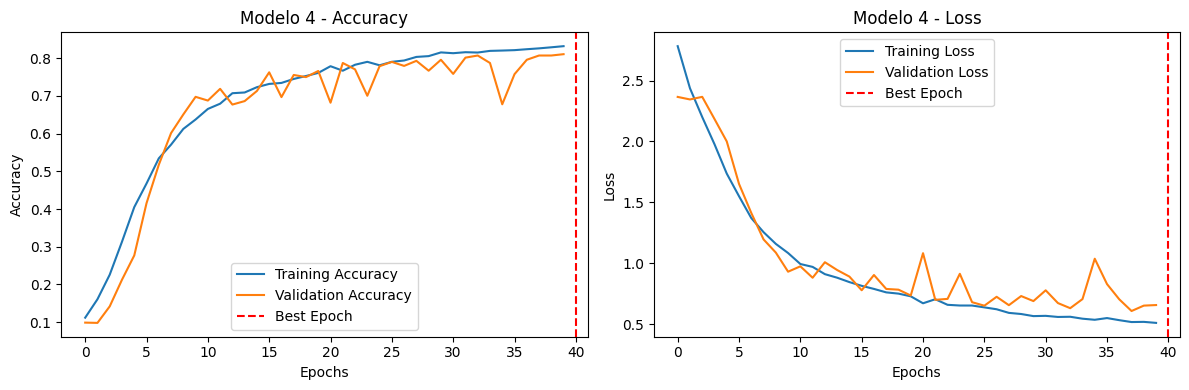

In [ ]:
plot_model_history(history4, early_stop4, model_name="Modelo 4")

En este modelo se presentan variaciones en la curva de validación; sin embargo, el desempeño aumentó de manera significativa, lo que demuestra que una arquitectura más profunda logra un efecto positivo en la accuracy.
Además, es importante notar que el mejor desempeño se alcanza en la última época, por lo que existe la posibilidad de ampliar el número de épocas en el siguiente modelo para evaluar si los resultados continúan mejorando.

##⭐ Modelo 5 ⭐

Para este quinto modelo se tomó como base el Modelo 4, pero se implementaron una serie de mejoras:

✅ Se aumentó la cantidad de capas convolucionales en el segundo y tercer bloque, incluyendo capas extra de 128 y 256 filtros respectivamente.

✅ Se sustituyó el Flatten por GlobalAveragePooling2D en el tercer bloque convolucional, lo que reduce el riesgo de overfitting.

✅ Se incrementó la cantidad de neuronas en las capas densas (512 → 256 → 128), junto con Dropout y BatchNormalization más agresivos, para un aprendizaje más robusto.

✅ Se ajustó la tasa de aprendizaje inicial a 0.0003 y se añadió ReduceLROnPlateau, permitiendo una optimización más fina y adaptativa durante el entrenamiento.

✅ Se aumentó ligeramente la tasa de Dropout en varios puntos para mejorar la regularización y prevenir sobreajuste dado el incremento de capacidad del modelo.

✅ Se incrementó el número de épocas a 50 y se mantuvo la paciencia de EarlyStopping en 7, dando más oportunidades al modelo de converger adecuadamente con el learning rate reducido.

In [ ]:
# ============================================
# DEFINIR CNN (Modelo 5)
# ============================================
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model5 = models.Sequential()

# Convolucional 1
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model5.add(layers.BatchNormalization())
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(0.2))
# Convolucional 2
model5.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(0.25))
# Convolucional 3
model5.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.GlobalAveragePooling2D())
model5.add(layers.Dropout(0.3))
# Capas densas
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.4))
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.3))
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dropout(0.25))
# Capa de salida
model5.add(layers.Dense(10, activation='softmax'))

# ============================================
# COMPILAR
# ============================================
model5.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen
model5.summary()

# ============================================
# CALLBACKS AVANZADOS
# ============================================
early_stop5 = EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# ============================================
# ENTRENAR
# ============================================
history5 = model5.fit(
    train_gen_aug,
    epochs=50,
    batch_size=64,
    validation_data=val_gen_aug,
    callbacks=[early_stop5, reduce_lr]
)

# ============================================
# GUARDAR MODELO
# ============================================
model5.save("model_5.h5")
print("\n📁 Modelo guardado como model_5.h5")

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │       131,58

 Total params: 1,596,106 (6.09 MB)

 Trainable params: 1,592,522 (6.07 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 76s 696ms/step - accuracy: 0.1037 - loss: 2.9668 - val_accuracy: 0.1011 - val_loss: 2.3565 - learning_rate: 3.0000e-04
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 569ms/step - accuracy: 0.1176 - loss: 2.7351 - val_accuracy: 0.1011 - val_loss: 2.5122 - learning_rate: 3.0000e-04
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 579ms/step - accuracy: 0.1350 - loss: 2.5802 - val_accuracy: 0.1011 - val_loss: 3.1053 - learning_rate: 3.0000e-04
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 558ms/step - accuracy: 0.1801 - loss: 2.3860 - val_accuracy: 0.1011 - val_loss: 3.6547 - learning_rate: 3.0000e-04
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 551ms/step - accuracy: 0.2217 - loss: 2.2432 - val_accuracy: 0.1025 - val_loss: 3.5902 - learning_rate: 3.0000e-04
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.2748 - loss: 2.0606
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 600ms/step - accuracy:


📁 Modelo guardado como model_5.h5


➡️ A continuación, se utiliza la función plot_model_history para analizar el desempeño del Modelo 5, permitiendo visualizar de forma clara sus métricas de entrenamiento y validación.


📊 Resultados del entrenamiento: Modelo 5

✨ Época con mejor desempeño: 48
📈 Mayor Accuracy de validación: 0.8360



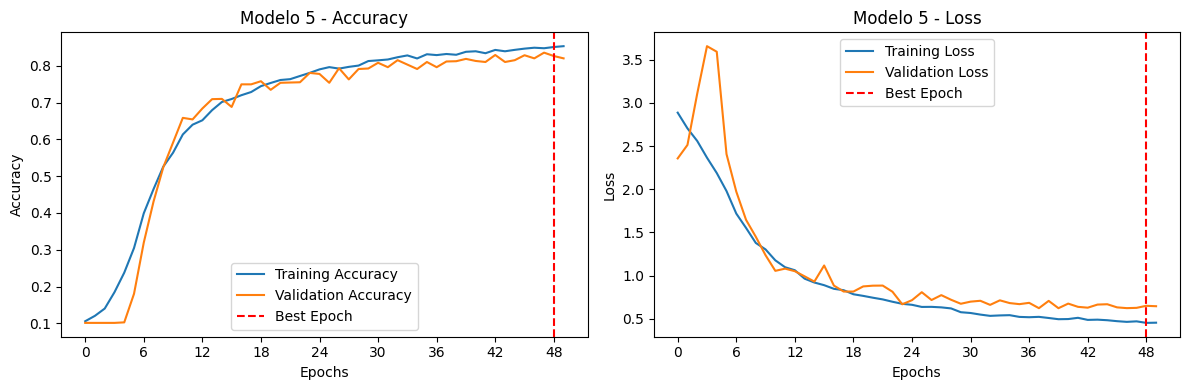

In [ ]:
plot_model_history(history5, early_stop5, model_name="Modelo 5")

###✨ Conclusiones de las gráficas de modelo ganador

En general, aunque este último modelo presenta picos y discordancias en las primeras épocas, esto es un comportamiento normal mientras el modelo explora el espacio de parámetros. A lo largo de las épocas, se puede observar cómo los valores se estabilizan progresivamente. La convergencia gradual de ambas curvas sugiere que no existe un sobreajuste específico a los datos de entrenamiento, sino que el modelo realmente aprende a identificar los patrones fundamentales de los números.

Se está obteniendo un excelente accuracy de validación del 83.6%, lo que representa un rendimiento muy sólido para un problema de clasificación de dígitos. Este nivel de precisión sugiere que:

🔸 La arquitectura es apropiada para la complejidad del problema

🔸 El proceso de aprendizaje fue efectivo en capturar las características esenciales

🔸 La estabilización de ambas métricas en las últimas épocas, junto con la mínima diferencia entre loss de entrenamiento y validación, confirma que hemos alcanzado un punto óptimo.

###✨ Estructura de modelo ganador

Para implementar el modelo ganador utilizando todas las imágenes de entrenamiento y evaluar su desempeño total, es necesario volver a cargar las imágenes de train, pero en esta ocasión no se dividen en entrenamiento y validación.

Además, se importa la carpeta de test con el objetivo de probar el desempeño del modelo sobre datos nuevos.

In [ ]:
# ============================================================
# Rutas en Drive
# ============================================================
train_path = "/content/drive/MyDrive/Train"
test_path  = "/content/drive/MyDrive/Test"

# ============================================================
# Verificar existencia de carpetas
# ============================================================
import os

if not os.path.exists(train_path):
    raise Exception(f"❌ La carpeta de entrenamiento no existe: {train_path}")
if not os.path.exists(test_path):
    raise Exception(f"❌ La carpeta de test no existe: {test_path}")

print("📁 Carpeta de entrenamiento encontrada:", train_path)
print("📁 Carpeta de test encontrada:", test_path)

# ============================================================
# Generadores
# ============================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador de entrenamiento CON aumento
train_gen_full = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Generador de test SIN aumento (solo normalización)
test_gen = ImageDataGenerator(rescale=1./255)

# Crear generadores
train_full = train_gen_full.flow_from_directory(
    train_path,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_set = test_gen.flow_from_directory(
    test_path,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


📁 Carpeta de entrenamiento encontrada: /content/drive/MyDrive/Train
📁 Carpeta de test encontrada: /content/drive/MyDrive/Test
Found 7100 images belonging to 10 classes.
Found 2068 images belonging to 10 classes.


Tras evaluar el desempeño de todos los modelos desarrollados, se concluyó que el modelo ganador es el Modelo 5, al tener el mejor accuracy en validación. Por lo tanto, se utilizó la misma arquitectura para construir el modelo final, que se compiló y entrenó durante 30 épocas utilizando todo el set de entrenamiento.

In [ ]:
# ============================================
# DEFINIR CNN (Modelo Final - Modelo 5)
# ============================================
from tensorflow.keras import models, layers

model_final = models.Sequential()

# Convolucional 1
model_final.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))
model_final.add(layers.Dropout(0.2))
# Convolucional 2
model_final.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))
model_final.add(layers.Dropout(0.25))
# Convolucional 3
model_final.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.GlobalAveragePooling2D())
model_final.add(layers.Dropout(0.3))
# Capas densas
model_final.add(layers.Dense(512, activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Dropout(0.4))
model_final.add(layers.Dense(256, activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Dropout(0.3))
model_final.add(layers.Dense(128, activation='relu'))
model_final.add(layers.Dropout(0.25))
# Capa de salida
model_final.add(layers.Dense(10, activation='softmax'))

# ============================================
# COMPILAR
# ============================================
model_final.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_final.summary()

# ============================================
# ENTRENAR MODELO FINAL CON TODO EL DATASET
# ============================================

history_final = model_final.fit(
    train_full,
    epochs=30,
    batch_size=64,
    verbose=1
)

print("✅ Entrenamiento final completado!")

# ============================================
# GUARDAR MODELO
# ============================================
model_final.save("final_model.h5")
print("📁 Modelo final guardado como final_model.h5")


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 512)            │       131,58

 Total params: 1,596,106 (6.09 MB)

 Trainable params: 1,592,522 (6.07 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 72s 514ms/step - accuracy: 0.1019 - loss: 3.0034
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 51s 460ms/step - accuracy: 0.1533 - loss: 2.5771
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 54s 484ms/step - accuracy: 0.2273 - loss: 2.2309
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 50s 455ms/step - accuracy: 0.4116 - loss: 1.6652
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 50s 452ms/step - accuracy: 0.5675 - loss: 1.2861
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 50s 450ms/step - accuracy: 0.6625 - loss: 1.0196
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 51s 461ms/step - accuracy: 0.7186 - loss: 0.8414
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 51s 455ms/step - accuracy: 0.7581 - loss: 0.7595
Epoch 9/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 52s 470ms/step - accuracy: 0.7849 - loss: 0.6839
Epoch 10/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 50s 449ms/step - accuracy: 0.7986 - loss: 0.6307
Epoch 11/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 52s 467ms/step - accuracy: 0.8241 - loss: 0.5706
Epoch 12/30
111/111

✅ Entrenamiento final completado!
📁 Modelo final guardado como final_model.h5


Primero, el modelo final realiza predicciones sobre el conjunto de prueba (test_set) generando probabilidades para cada clase de cada imagen. Estas probabilidades se convierten en las clases predichas seleccionando la que tiene mayor valor. Además, se extraen las etiquetas verdaderas y los nombres de las clases para poder comparar los resultados. A partir de esto, se genera un reporte de clasificación que muestra métricas clave como precisión (precision), sensibilidad (recall) y F1-score para cada clase, lo que permite evaluar el desempeño del modelo de manera cuantitativa.

Posteriormente, se construye una matriz de confusión, que indica cuántas imágenes fueron clasificadas correctamente y cuántas se confundieron con otras clases. Esta matriz se visualiza mediante un heatmap usando colores y números, con las clases verdaderas en el eje Y y las predichas en el eje X.

2068/2068 ━━━━━━━━━━━━━━━━━━━━ 902s 436ms/step

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       204
           1       0.90      0.81      0.85       211
           2       0.85      0.87      0.86       209
           3       0.66      0.94      0.77       207
           4       0.91      0.83      0.87       207
           5       0.90      0.86      0.88       204
           6       0.96      0.88      0.92       208
           7       0.89      0.91      0.90       207
           8       0.96      0.80      0.87       207
           9       0.84      0.92      0.88       204

    accuracy                           0.87      2068
   macro avg       0.88      0.87      0.87      2068
weighted avg       0.88      0.87      0.87      2068



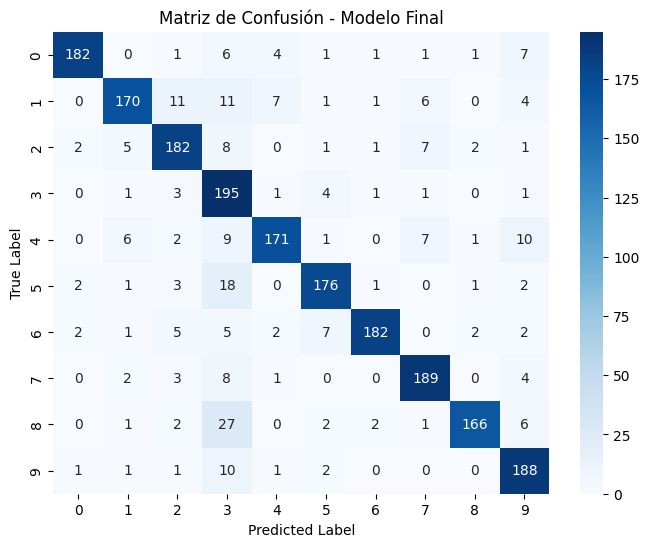

In [ ]:
# ============================================================
# TEST
# ============================================================
import numpy as np

pred_probs = model_final.predict(test_set)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())


# ============================================================
# MÉTRICAS
# ============================================================
from sklearn.metrics import classification_report, confusion_matrix

print("\n📊 Classification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# ============================================================
# 8. MATRIZ DE CONFUSIÓN
# ============================================================
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Matriz de Confusión - Modelo Final")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

Como se puede observar en la matriz de confusión, representada en forma de heatmap, el modelo genera una gran cantidad de true positives a lo largo de todas las clases. El único dígito que muestra un desempeño relativamente bajo es el 3, que tiende a confundirse con los dígitos 5 y 8. Fuera de este caso, el modelo final demuestra un funcionamiento sólido y consistente en la clasificación de los demás dígitos.

En cuanto a las métricas obtenidas por clase, se puede notar que el dígito 3 presenta la menor exactitud (accuracy) con 0.66, seguido del dígito 9 con 0.84. En general, los valores de recall y F1-score muestran resultados positivos, sin que se observen problemas significativos en el desempeño del modelo para las demás clases.

De manera similar, al analizar las métricas, se observa que el valor promedio de accuracy es de aproximadamente 87 %. Comparado con el accuracy de validación del Modelo 5, que fue de 83.6 %, esto indica que el entrenamiento fue exitoso. Cabe destacar que el set de test incluía varias imágenes que podían representar un reto para el modelo; sin embargo, la técnica de aumento de datos resultó efectiva, ya que permitió preparar al modelo con una mayor diversidad de imágenes, lo que mejoró su capacidad de generalización.